In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score,f1_score,log_loss, make_scorer

In [2]:
df = pd.read_csv('data/cleaned_review_data.csv', index_col = 0)

In [3]:
df.iloc[:,:22].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_id               10000 non-null  object 
 1   user_id                 10000 non-null  object 
 2   business_id             10000 non-null  object 
 3   stars                   10000 non-null  float64
 4   useful                  10000 non-null  int64  
 5   funny                   10000 non-null  int64  
 6   cool                    10000 non-null  int64  
 7   text                    10000 non-null  object 
 8   date                    10000 non-null  object 
 9   year                    10000 non-null  int64  
 10  month                   10000 non-null  int64  
 11  day                     10000 non-null  int64  
 12  hour                    10000 non-null  int64  
 13  min                     10000 non-null  int64  
 14  sec                     10000 non-null 

In [4]:
df['stars'] = df['stars'].astype('int64')

<AxesSubplot:>

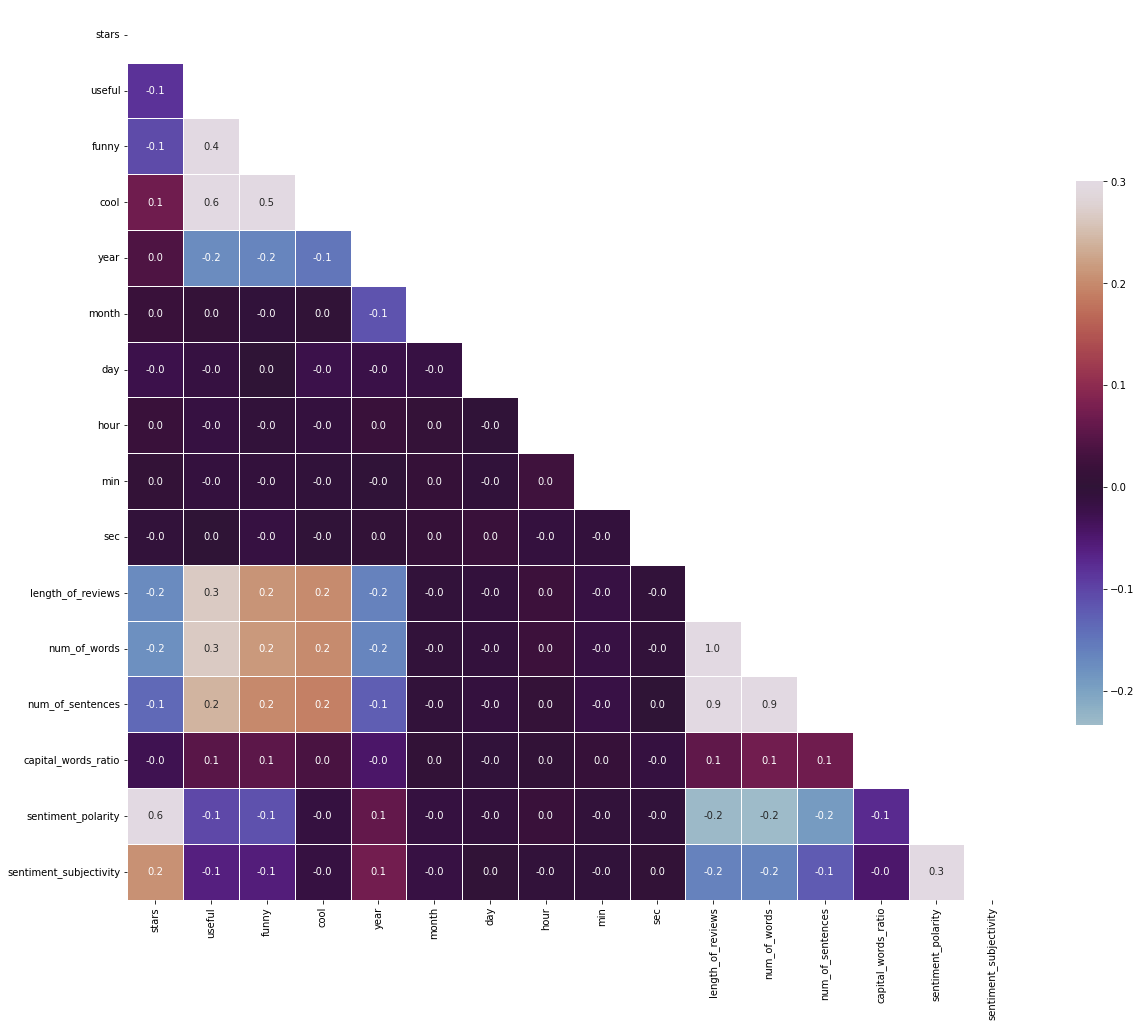

In [5]:
corr = df.iloc[:,:22].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, fmt=".1f", mask=mask, cmap='twilight', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
X = df.drop(columns=['review_id', 'user_id', 'business_id', 'text', 'date', 'month', 'day', 'hour', 'min', 'cleaned_text'])
y = df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [8]:
X.iloc[:,:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   stars                   10000 non-null  int64  
 1   useful                  10000 non-null  int64  
 2   funny                   10000 non-null  int64  
 3   cool                    10000 non-null  int64  
 4   year                    10000 non-null  int64  
 5   sec                     10000 non-null  int64  
 6   length_of_reviews       10000 non-null  int64  
 7   num_of_words            10000 non-null  int64  
 8   num_of_sentences        10000 non-null  int64  
 9   capital_words_ratio     10000 non-null  float64
 10  sentiment_polarity      10000 non-null  float64
 11  sentiment_subjectivity  10000 non-null  float64
 12  tags_000                10000 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


### Model Selection

In [9]:
models = [ KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier()]

for ml in models:
    
    ### train
    ml.fit(X_train, y_train)
    
    ### predict
    y_pred = ml.predict(X_test)
 
    print(ml, 'test accuracy:', ml.score(X_test, y_test))
    # print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))

/Users/yonniechan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yonniechan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

KNeighborsClassifier() test accuracy: 0.3775
[[ 40  16  22  57  75]
 [ 28  11  26  49  51]
 [ 25  17  18  71  95]
 [ 41  30  60 146 253]
 [ 32  29  61 207 540]]
DecisionTreeClassifier() test accuracy: 1.0
[[210   0   0   0   0]
 [  0 165   0   0   0]
 [  0   0 226   0   0]
 [  0   0   0 530   0]
 [  0   0   0   0 869]]
RandomForestClassifier() test accuracy: 0.7665
[[159   1   2  32  16]
 [ 43   5  14  74  29]
 [ 13   4  23 168  18]
 [  1   0   2 481  46]
 [  0   0   0   4 865]]
GradientBoostingClassifier() test accuracy: 1.0
[[210   0   0   0   0]
 [  0 165   0   0   0]
 [  0   0 226   0   0]
 [  0   0   0 530   0]
 [  0   0   0   0 869]]


In [ ]:
# TODO
# hyperparameter grid search (reduce tree depth, change eval_metrix)